<a href="https://colab.research.google.com/github/esadausk/data_mining/blob/main/suport_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPPORT VECTOR MACHINE



In [ ]:
#Libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

Linear Classifier

In [ ]:
#Loading data with two classes and two features only
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

In [ ]:
#Standardize
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#SVM classifier 
svc = LinearSVC(C=1.0)

#Train model
model = svc.fit(features_standardized, target)

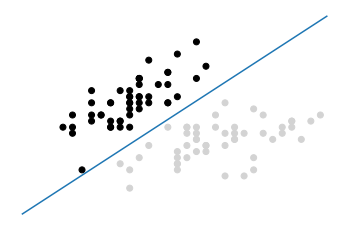

In [ ]:
# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [ ]:
#New observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

array([0])

Handling Linearly Inseparable Classes Using Kernels

In [ ]:
# Set randomization seed
np.random.seed(0)

# Generate two features
features = np.random.randn(200, 2)

# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

In [ ]:
# Plot observations and decision boundary hyperplane
def plot_decision_regions(X, y, classifier):
  cmap = ListedColormap(("red", "blue"))
  xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
              alpha=0.8, c=cmap(idx),
              marker="+", label=cl)

In [ ]:
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# Train model
svc_linear.fit(features, target)

print(svc_linear)
#Alpha coefs
alphas = np.abs(svc_linear.dual_coef_)
print(alphas)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
[[0.28290001 0.40888134 0.69178135]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


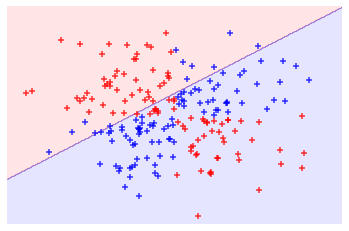

In [ ]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

In [ ]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


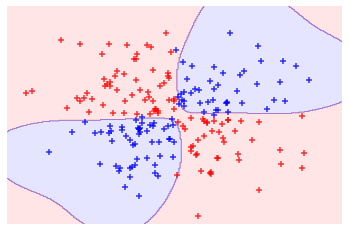

In [ ]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

Creating Predicted Probabilities

In [ ]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [ ]:
# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[.4, .4, .4, .4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00623541, 0.96973799, 0.0240266 ]])

Identifying Support Vectors

In [ ]:
#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# View support vectors
model.support_vectors_

#Alpha coefs
alphas = np.abs(svc.dual_coef_)
print(alphas)

[[0.26437481 0.35454649 0.21024209 0.40867921]]


In [ ]:
model.support_
model.n_support_

array([2, 2], dtype=int32)

Handling Imbalanced Classes - increase the penalty using class_weight.

In [ ]:
#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)